```haskell
import Data.Ratio
import Control.Applicative
import System.Environment

arr :: Rational -> Rational -> Rational -> Rational -> Integer -> (Rational, Rational)
arr a1 a2 p q n =
  let d :: Rational
      d = p * p + 4 * q
      
      mul :: (Rational, Rational) -> (Rational, Rational) -> (Rational, Rational)
      mul (w, x) (y, z) = (w * y + x * z * d, w * z + x * y)

      add :: (Rational, Rational) -> (Rational, Rational) -> (Rational, Rational)
      add (w, x) (y, z) = (w + y, x + z)

      sub :: (Rational, Rational) -> (Rational, Rational) -> (Rational, Rational)
      sub (w, x) (y, z) = (w - y, x - z)
      
      square :: (Rational, Rational) -> (Rational, Rational)
      square x = mul x x

      fastPow :: (Rational, Rational) -> Integer -> (Rational, Rational)
      fastPow _    0 = (1, 0)
      fastPow base 1 = base
      fastPow base pow | even pow = square (fastPow base (div pow 2))
                        | odd  pow = mul (square (fastPow base (div (pow-1) 2))) base
      
      alpha :: (Rational, Rational)
      alpha = mul (add (p, 0) (0, 1)) (1 % 2, 0)

      beta :: (Rational, Rational)
      beta = mul (sub (p, 0) (0, 1)) (1 % 2, 0)
   in mul (
        sub (
          mul (
            sub (a2, 0) (mul beta (a1, 0))
          )
          (fastPow alpha ＄ n - 1)
        )
        (
          mul (
            sub (a2, 0) (mul alpha (a1, 0))
          )
          (fastPow beta ＄ n - 1)
        )
      )
      (0, denominator d % numerator d)

main :: IO ()
main = do
  [a1, a2, p, q, n] <- getArgs
  print ＄ numerator ＄ fst ＄ arr (s a1) (s a2) (s p) (s q) (read n)
  where s = fromInteger . read
```

こんな感じのHaskellプログラムを書いた。  
1 1 1 1 nと入力すると、n番目のフィボナッチ数が出力される。  
三項間漸化式の一般項から計算している。  
ベンチマークしてみた。

| 入力 | real | user | sys |
|:-----------:|:------------:|:------------:|:------------:|
| 1 1 1 1 100000 | 0m0.021s | 0m0.007s | 0m0.007s |
| 1 1 1 1 1000000 | 0m0.068s | 0m0.053s | 0m0.008s |
| 1 1 1 1 5000000 | 0m0.386s | 0m0.359s | 0m0.018s |
| 1 1 1 1 10000000 | 0m0.795s | 0m0.761s | 0m0.026s |
| 1 1 1 1 15000000 | 0m1.369s | 0m1.309s | 0m0.047s |
| 1 1 1 1 20000000 | 0m1.870s | 0m1.789s | 0m0.056s |
| 1 1 1 1 30000000 | 0m2.992s | 0m2.872s | 0m0.093s |
| 1 1 1 1 100000000 | 0m13.418s | 0m12.587s | 0m0.527s |

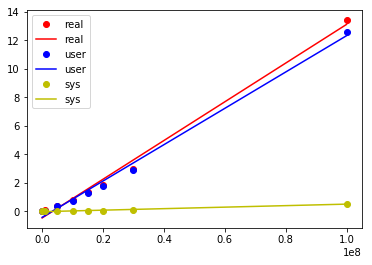

In [70]:
import matplotlib.pyplot as plt
import numpy as np

n = [100000,
1000000,
5000000,
10000000,
15000000,
20000000,
30000000,
100000000]

nn = np.linspace(0, 100000000, 100)

real = [0.021,
0.068,
0.386,
0.795,
1.369,
1.870,
2.992,
13.418]

fr = np.poly1d(np.polyfit(n, real, 1))
intr = fr(nn)

user = [0.007,
0.053,
0.359,
0.761,
1.309,
1.789,
2.872,
12.587]

fu = np.poly1d(np.polyfit(n, user, 1))
intu = fu(nn)

sys = [0.007,
0.008,
0.018,
0.026,
0.047,
0.056,
0.093,
0.527]

fs = np.poly1d(np.polyfit(n, sys, 1))
ints = fs(nn)

plt.cla()
plt.clf()

plt.plot(n, real, 'ro', label="real")
plt.plot(nn, intr, 'r', label="real")
plt.plot(n, user, 'bo', label="user")
plt.plot(nn, intu, 'b', label="user")
plt.plot(n, sys, 'yo', label="sys")
plt.plot(nn, ints, 'y', label="sys")
plt.legend()

plt.show()

各点は実際の計測値、実線は最小二乗法で一次式に近似したものである。

試しにfr, fu, fsに150000000を代入してみて、1 1 1 1 150000000を入力した時の所要時間を予測してみる。

In [75]:
fr(150000000)

19.917730957690232

In [76]:
fu(150000000)

18.708190203186941

In [77]:
fs(150000000)

0.77191063048752651

実際に走らせてみると、次のようになった。
```bash
$ time ./suretu_advanced 1 1 1 1 150000000 > /dev/null

real	0m19.194s
user	0m18.423s
sys	0m0.672s
```
おお、結構当たっている。。。。どころか予測値よりも速い。。。。すげえ  


再帰、リストとの比較もやってみる。

- 再帰  
コードは次の通り。
```haskell
```